[Blog and code for Auto encoder (maile tal gareko yahi blog bata ho)](https://blog.keras.io/building-autoencoders-in-keras.html)

# AUTO ENCODER ( targets are generated from the input data)
programming way ma bujda last ma previous ko input le multiply garni.
* Unsupervise machine  Learning similar to the pca.
* it minimize the same objective function as pca.
* It is a neural network.
* The neural network's target output us its input.
* Reconstruct the input 
* Label are input
* Dimentionality reduction

#  PCA VS AUTOENCODER 
* Auto encoder can learn non-linear transform unlike PCA.
* An autoencoder doesn't have to learn dense layers. 
* More efficiency to learn several layers with an autoencoder.
* It gives a representation as the output of each layer.
* autoencoders can learn data projections that are more interesting than PCA or other basic techniques.

# WHY AUTOENCODER
* Data Denosing .
* Dimentionality reduction for data visualization


# WHAT IS AUTOENCODER 
* An autoencoder neural network is an unsupervise machine learning algorithm that applies backpropagation ,setting the target values to be equal to the inputs.


# There are 4 hyperparameter that we need to set before training an autoencoder.

* Code:The number of nodes in the middle layer.small size results in more compression.

* Number of layer :encoder ra decoder ma vayako number of layer input ra output bahek.
* Loss function:either mean squared error or binary crossentropy.
if the input id the range of [0,1] then we typically use crossentropy ,otherwise we use the mean square error.

In [0]:
#!pip install tensorflow==2.0.0
import tensorflow as tf
print(tf.__version__)
from  tensorflow.keras.layers  import Input,Dense
from tensorflow.keras.models import Model

2.0.0


In [0]:
from keras.datasets import mnist
import numpy as np


In [0]:
(x_train,_),(x_test,_)=mnist.load_data()
x_train=x_train.astype('float32')/255
x_test=x_test.astype('float32')/255
x_train=x_train.reshape((len(x_train),np.prod(x_train.shape[1:]))) # flatten the input image 28*28 into 784 size.
x_test=x_test.reshape((len(x_test),np.prod(x_test.shape[1:])))
print (x_train.shape)
print(x_test.shape)


(60000, 784)
(10000, 784)


# single fully-connected neural layer as encoder and decoder.

In [0]:
input_size=784
hidden_size=128
encoding_dim=32 # this is the size of our encoded representation
input_img=Input(shape=(input_size,))
encoded=Dense(encoding_dim,activation='relu')(input_img)

decoded=Dense(input_size,activation='sigmoid')(encoded)

autoencoder=Model(input_img,decoded)
autoencoder.compile(optimizer='adam',loss='binary_crossentropy')


# Seperate encoder model

# model maps an input to its encoded representation
* **encoder xuttai and decoder xuttai ni garna milxa**

* **NOTE::tesko lagi model ma encoded part ko matrai pathuni** 

In [35]:
encoder=Model(input_img,encoded)  # This model maps an input to its encoded  representation
encoder.summary()


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 4, 4, 8)           0   

# As wel as the decoder model
* **decoder matrai garnu parya.**

* **decoder lai model ma pass garnu parxa.**

In [0]:
encoded_input=Input(shape=(encoding_dim,))
decoder_layer=autoencoder.layers[-1]
decoder=Model(encoded_input,decoder_layer(encoded_input))

In [0]:
autoencoder.fit(x_train,x_train,epochs=50,batch_size=256,shuffle=True,validation_data=(x_test,x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 4s 67us/sample - loss: 0.2780 - val_loss: 0.1911
Epoch 2/50
60000/60000 [==============================] - 3s 56us/sample - loss: 0.1715 - val_loss: 0.1541
Epoch 3/50
60000/60000 [==============================] - 3s 57us/sample - loss: 0.1445 - val_loss: 0.1335
Epoch 4/50
60000/60000 [==============================] - 3s 56us/sample - loss: 0.1278 - val_loss: 0.1202
Epoch 5/50
60000/60000 [==============================] - 3s 55us/sample - loss: 0.1171 - val_loss: 0.1119
Epoch 6/50
60000/60000 [==============================] - 3s 55us/sample - loss: 0.1102 - val_loss: 0.1061
Epoch 7/50
60000/60000 [==============================] - 3s 56us/sample - loss: 0.1053 - val_loss: 0.1021
Epoch 8/50
60000/60000 [==============================] - 3s 56us/sample - loss: 0.1017 - val_loss: 0.0990
Epoch 9/50
60000/60000 [==============================] - 3s 55us/sample - loss: 0.0992 - val_

In [0]:
encoded_imgs=encoder.predict(x_test)
decoded_imgs=decoder.predict(encoded_imgs)


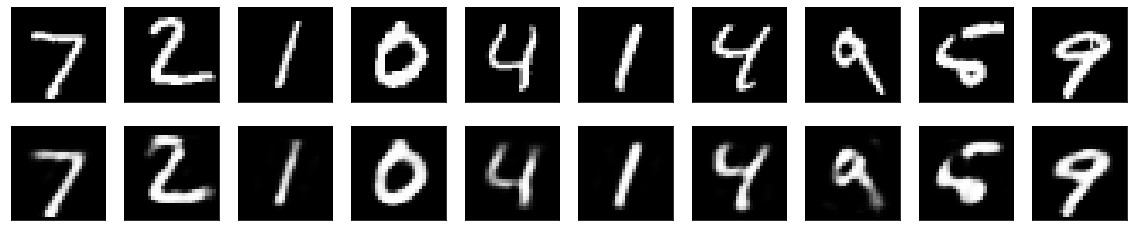

In [0]:
import matplotlib.pyplot as plt
n=10
plt.figure(figsize=(20,4))
for i in range(n):
  # display original
  ax=plt.subplot(2,n,i+1)
  plt.imshow(x_test[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax=plt.subplot(2,n,i+1+n)
  plt.imshow(decoded_imgs[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()



#Adding a sparsity constraint on the encoded representations
In the previous example, the representations were only constrained by the size of the hidden layer (32). In such a situation, what typically happens is that the hidden layer is learning an approximation of PCA (principal component analysis). But another way to constrain the representations to be compact is to add a sparsity contraint on the activity of the hidden representations, so fewer units would "fire" at a given time. In Keras, this can be done by adding an activity_regularizer to our Dense layer:


In [0]:
from keras import regularizers

encoding_dim = 32

input_img = Input(shape=(784,))
# add a Dense layer with a L1 activity regularizer
encoded = Dense(encoding_dim, activation='relu',
                activity_regularizer=regularizers.l1(10e-5))(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)

# Deep autoencoder
We do not have to limit ourselves to a single layer as encoder or decoder, we could instead use a stack of layers, such as:

In [0]:
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

In [0]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 6s 95us/sample - loss: 0.6932 - val_loss: 0.6932
Epoch 2/100
60000/60000 [==============================] - 5s 86us/sample - loss: 0.6932 - val_loss: 0.6931
Epoch 3/100
60000/60000 [==============================] - 5s 87us/sample - loss: 0.6931 - val_loss: 0.6931
Epoch 4/100
60000/60000 [==============================] - 5s 87us/sample - loss: 0.6930 - val_loss: 0.6930
Epoch 5/100
60000/60000 [==============================] - 5s 87us/sample - loss: 0.6929 - val_loss: 0.6929
Epoch 6/100
60000/60000 [==============================] - 5s 85us/sample - loss: 0.6929 - val_loss: 0.6928
Epoch 7/100
60000/60000 [==============================] - 5s 87us/sample - loss: 0.6928 - val_loss: 0.6927
Epoch 8/100
60000/60000 [==============================] - 5s 85us/sample - loss: 0.6927 - val_loss: 0.6927
Epoch 9/100
60000/60000 [==============================] - 5s 87us/sample - loss: 0.69

# Convolution Autoencoder 
 * The encoder will consist in a stack of Conv2D and MaxPooling2D layers (max pooling being used for spatial down-sampling), while the decoder will consist in a stack of Conv2D and UpSampling2D layers.

In [1]:
!pip install tensorflow==2.0.0

     |████████████████████████████████| 86.3MB 72kB/s 
     |████████████████████████████████| 450kB 56.3MB/s 
     |████████████████████████████████| 3.8MB 55.2MB/s 
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstalled tensorflow-1.15.0


In [0]:
from tensorflow.keras.layers import Input,Dense,Conv2D,MaxPooling2D,UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras import backend as k

In [0]:
input_img=Input(shape=(28,28,1))


In [13]:
x=Conv2D(16,(3,3),activation='relu',padding='same')(input_img)
x=MaxPooling2D((2,2),padding='same')(x)
x=Conv2D(8,(3,3),activation='relu',padding='same')(x)
x=MaxPooling2D((2,2),padding='same')(x)
x=Conv2D(8,(3,3),activation='relu',padding='same')(x)
encoded=MaxPooling2D((2,2),padding='same')(x)
print(encoded.shape)

(None, 4, 4, 8)


In [0]:
x=Conv2D(8,(3,3),activation='relu',padding='same')(encoded)
x=UpSampling2D((2,2))(x)
x=Conv2D(8,(3,3),activation='relu',padding='same')(x)
x=UpSampling2D((2,2))(x)
x=Conv2D(16,(3,3),activation='relu')(x)
x=UpSampling2D((2,2))(x)
decode=Conv2D(1,(3,3),activation='sigmoid',padding='same')(x)



In [0]:
autoencoder=Model(input_img,decode) # this model maps an input to its reconstruction


In [0]:
autoencoder.compile(optimizer='adadelta',loss='binary_crossentropy')

In [14]:
from tensorflow.keras.datasets import mnist
import numpy as np
(x_train,_),(x_test,_)=mnist.load_data()
x_train=x_train.astype('float')/255
x_test=x_test.astype('float')/255
x_train=np.reshape(x_train,(len(x_train),28,28,1))
x_test=np.reshape(x_test,(len(x_test),28,28,1))

11493376/11490434 [==============================] - 0s 0us/step


In [18]:
from tensorflow.keras.callbacks import TensorBoard
autoencoder.fit(x_train,x_train,epochs=20,batch_size=128,shuffle=True,validation_data=(x_test,x_test),
                callbacks=[TensorBoard(log_dir='temp/autoencoder')])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 88s 1ms/sample - loss: 0.6885 - val_loss: 0.6864
Epoch 2/20
60000/60000 [==============================] - 89s 1ms/sample - loss: 0.6832 - val_loss: 0.6793
Epoch 3/20
60000/60000 [==============================] - 90s 1ms/sample - loss: 0.6720 - val_loss: 0.6619
Epoch 4/20
60000/60000 [==============================] - 89s 1ms/sample - loss: 0.6365 - val_loss: 0.5964
Epoch 5/20
60000/60000 [==============================] - 89s 1ms/sample - loss: 0.5357 - val_loss: 0.5005
Epoch 6/20
60000/60000 [==============================] - 89s 1ms/sample - loss: 0.4900 - val_loss: 0.4877
Epoch 7/20
60000/60000 [==============================] - 89s 1ms/sample - loss: 0.4787 - val_loss: 0.4769
Epoch 8/20
60000/60000 [==============================] - 88s 1ms/sample - loss: 0.4681 - val_loss: 0.4661
Epoch 9/20
60000/60000 [==============================] - 88s 1ms/sample - loss: 0.4573 - val_

In [32]:
autoencoder.summary()
#encoder.summary()
#decoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 4, 4, 8)           0     

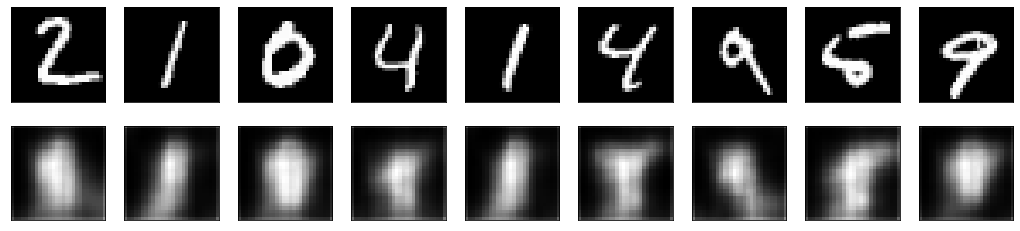

In [23]:
import matplotlib.pyplot as plt

decoded_imgs = autoencoder.predict(x_test) # decode_image or reconstruction image

n = 10
plt.figure(figsize=(20, 4))
for i in range(1,n):
    # display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

* We can also have a look at the 128-dimensional encoded representations. These representations are 8x4x4, so we reshape them to 4x32 in order to be able to display them as grayscale images.

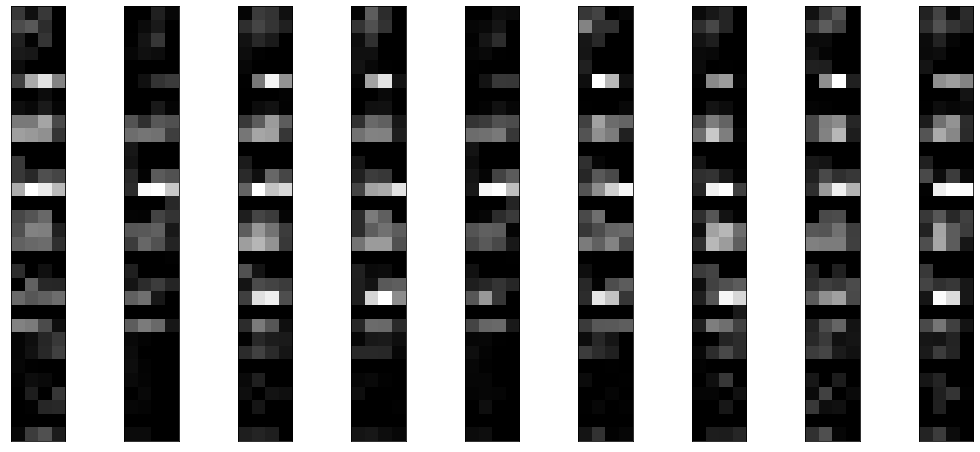

In [39]:
encoded_img=encoder(input_img,encoded)
encoded_imgs=encoder.predict(x_test)


n = 10
plt.figure(figsize=(20, 8))
for i in range(1,n):
    ax = plt.subplot(1, n, i)
    plt.imshow(encoded_imgs[i].reshape(4, 4 * 8).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Application to image denoising
* Let's put our convolutional autoencoder to work on an image denoising problem. It's simple: we will train the autoencoder to map noisy digits images to clean digits images.
* Here's how we will generate synthetic noisy digits: we just apply a gaussian noise matrix and clip the images between 0 and 1.


In [0]:
from tensorflow.keras.datasets import mnist

In [0]:
(x_train,_),(x_test,_)=mnist.load_data()

In [50]:
print(x_train.shape)
print(x_train[0])



(60000, 28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 25

In [0]:
x_train=x_train.astype('float32')/255
x_test=x_test.astype('float32')/255


In [53]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [0]:
x_train=np.reshape(x_train,(len(x_train),28,28,1))
x_test=np.reshape(x_test,(len(x_test),28,28,1))

In [0]:
print(x_train.shape)
print(x_train[0])

In [0]:
noise_factor=0.5
x_train_noisy=x_train + noise_factor * np.random.normal(loc=0.0,scale=1.0,size=x_train.shape)
x_test_noisy=x_test+noise_factor*np.random.normal(loc=0.0,scale=1.0,size=x_test.shape)

In [0]:
x_train_noisy=np.clip(x_train_noisy,0,1)
x_test_noisy=np.clip(x_test_noisy,0,1)

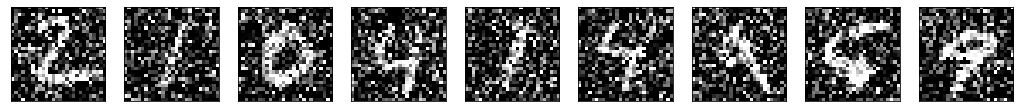

In [61]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(1,n):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [0]:
input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (7, 7, 32)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [64]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=5,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/tb', histogram_freq=0, write_graph=False)])

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 169s 3ms/sample - loss: 0.7024 - val_loss: 0.6834
Epoch 2/5
60000/60000 [==============================] - 170s 3ms/sample - loss: 0.6618 - val_loss: 0.6364
Epoch 3/5
60000/60000 [==============================] - 169s 3ms/sample - loss: 0.5964 - val_loss: 0.5536
Epoch 4/5
60000/60000 [==============================] - 170s 3ms/sample - loss: 0.5251 - val_loss: 0.5136
Epoch 5/5
60000/60000 [==============================] - 168s 3ms/sample - loss: 0.5047 - val_loss: 0.5036
